# Gaint Market Sales Forecasting

## Step 1 : Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Import Time Series Data

In [2]:
# Read from CSV file - CSV is kept in the same directory 
retail_data = pd.read_csv('Global+Superstore+Data.csv')

In [3]:
#Head() to check first 5 rows of data
retail_data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
#Determine shape - number of rows and columns 
retail_data.shape

(51290, 5)

There are 51290 rows and 5 columns

In [5]:
#Summary of numerical columns
retail_data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
#Column information
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


No missing value, Convert Order-date to date-time format

## Step 3 : Data Preparation



### Step 3.1 : Convert Order-date into Date-time format

In [7]:
#Convert Oder-Date into date-time format and get Year-Month format
retail_data['Order Date'] = pd.to_datetime(retail_data['Order Date']).dt.to_period('m')

In [8]:
#Check dataframe
retail_data= retail_data.sort_values(by=['Order Date'])
retail_data.head()

,Order Date,Segment,Market,Sales,Profit
15262,2011-01,Corporate,EU,139.65,15.30
26744,2011-01,Consumer,EU,88.44,15.84
48614,2011-01,Corporate,EU,11.43,4.11
9417,2011-01,Consumer,LATAM,491.00,122.70
48590,2011-01,Home Office,US,4.71,0.00


In [9]:
#Check datatype of Order date
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.3+ MB


### Step 3.2: Creating Market_Segment column

In [10]:
# Create a new column Market_Segment which combines Market and Segment columns
retail_data['Market_Segment'] = retail_data['Market'] + '_' + retail_data['Segment']
retail_data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
15262,2011-01,Corporate,EU,139.65,15.30,EU_Corporate
26744,2011-01,Consumer,EU,88.44,15.84,EU_Consumer
48614,2011-01,Corporate,EU,11.43,4.11,EU_Corporate
9417,2011-01,Consumer,LATAM,491.00,122.70,LATAM_Consumer
48590,2011-01,Home Office,US,4.71,0.00,US_Home Office


In [11]:
#Check counts of each column
retail_data.nunique()

Order Date           48
Segment               3
Market                7
Sales             22995
Profit            24575
Market_Segment       21
dtype: int64

### Step 3.3:  Let's explore unique market, segment, market-segment

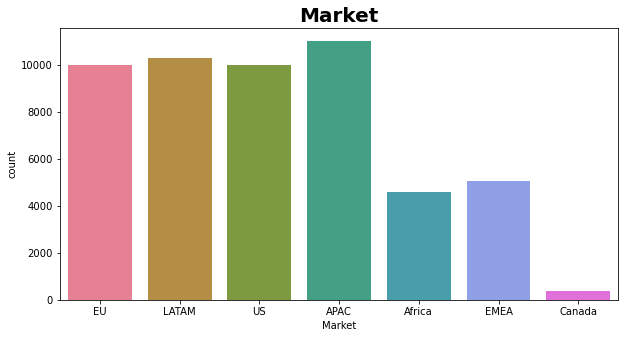

In [12]:
#Plot different market
plt.figure(figsize=(10,5))
sns.countplot(retail_data['Market'], palette='husl')
plt.title('Market', fontweight='bold', size=20)
plt.show()

APAC seems to be the highest running market among all

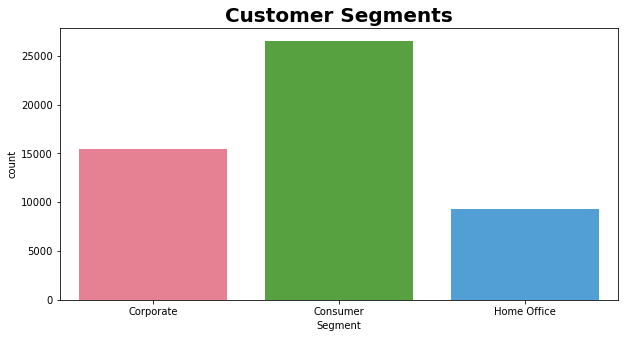

In [13]:
#Let's plot three Customer segment
plt.figure(figsize=(10,5))
sns.countplot(retail_data['Segment'], palette='husl')
plt.title('Customer Segments',fontweight='bold', size=20)
plt.show()

Consumer segment seems to be dominating

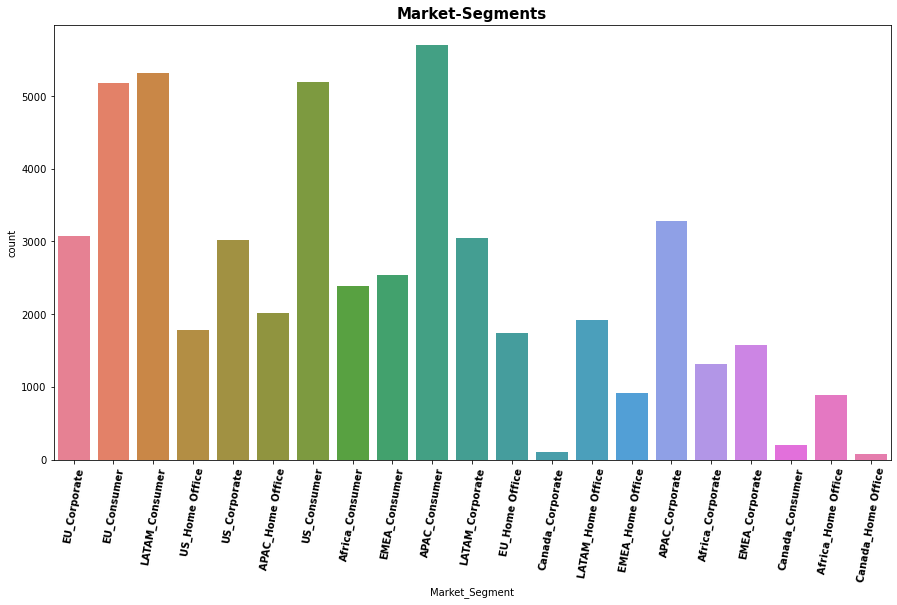

In [14]:
#Lets plot 21 unique market-segments
plt.figure(figsize=(15,8))
sns.countplot(retail_data['Market_Segment'], palette='husl')
plt.title('Market-Segments',fontweight='bold', size=15)
plt.xticks(rotation = 80,fontweight="bold")
plt.show()

APAC Consumer has got highest attention

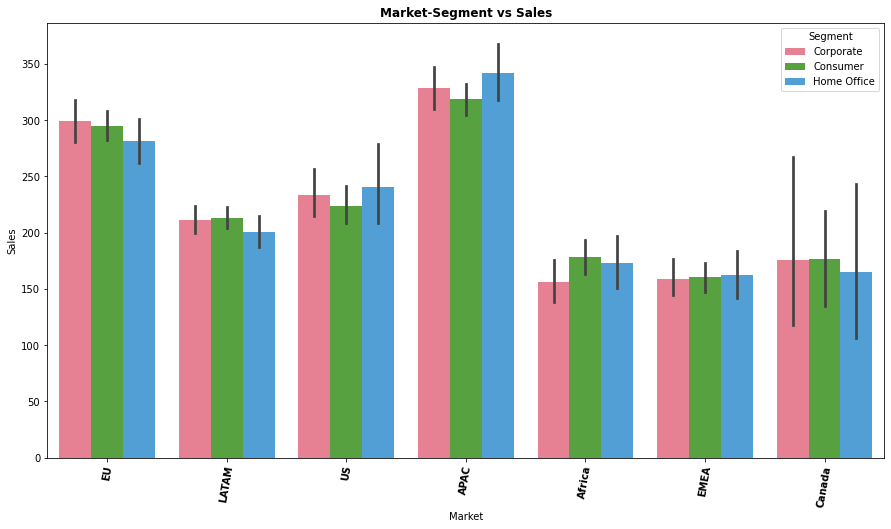

In [15]:
#Let's plot market , Sales
plt.figure(figsize=(15,8))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=retail_data, palette='husl')
plt.title('Market-Segment vs Sales', fontweight='bold')
plt.xticks(rotation = 80,fontweight="bold")
plt.show()

APAC is having highest in sales in all customer segment

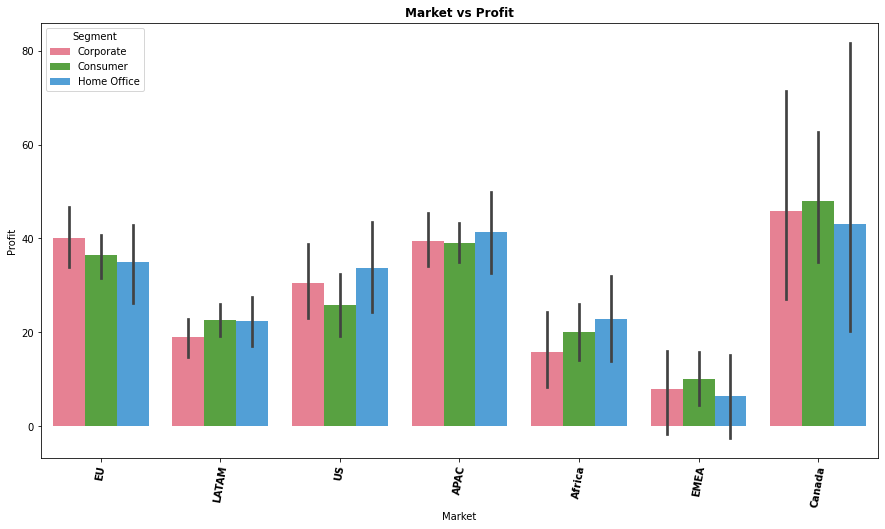

In [16]:
#Lets plot for Market segment with Profit
plt.figure(figsize=(15,8))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=retail_data, palette='husl')
plt.title('Market vs Profit', fontweight='bold')
plt.xticks(rotation = 80,fontweight="bold")
plt.show()

Canada and APAC have highest profit

### Step 3.4: Let's Drop Market and Segment Columns 

In [17]:
#Drop Market and Segment columns as they are no more required
retail_data=retail_data.drop(['Market','Segment'],axis=1)
retail_data.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


### Step 3.5: Monthly aggregate transaction data


In [18]:
#Aggregaring monthly data
retail_segment_profit= retail_data.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
retail_segment_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [19]:
retail_segment_profit.shape

(48, 21)

We have 48 months for 21 segments

## Step 3.6: Train-test split

In [20]:
#Let's keep 42 months as train data and rest as testing set of data and split it
train_len = 42
train = retail_segment_profit[0:train_len] # First 42 months:training set
test = retail_segment_profit[train_len:] # last 6 months:test set

In [21]:
#training data shape
train.shape

(42, 21)

In [22]:
#Check first 5 rows of data
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


## Step 3.7: Calculate CoV on Profit for 21 segments on train data

Compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.
When there is less varience, profit is high

In [23]:
#Mean of train data
mean=np.mean(train)
#Standard deviation of train data
std= np.std(train)

#Cov_df dataframe with Cov values
CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


In [24]:
#Minimum Cov
min(CoV_df["CoV"])

0.5227250555218101

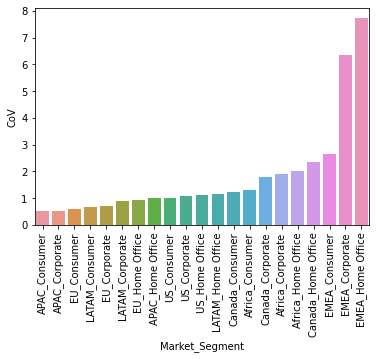

In [25]:
#Plot market-segment v/s Cov
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df)
plt.xticks(rotation = 90)
plt.show()

#### Lowest value for Cov is 0.5227250555218101 for APAC_Consumer. The most profitable market-segment is APAC_Consumer

## Step 3.8: Convert order date to Timestamp

In [26]:
#Converting order date to timestamp
retail_data['Order Date'] = retail_data['Order Date'].astype(str)
retail_data['Order Date']=pd.to_datetime(retail_data['Order Date'])
retail_data['Order Date'].dtype

dtype('<M8[ns]')

## Step 3.9: Take data for Best market segment APAC Consumer

In [27]:
#Filter only APAC Consumer
retail= retail_data[(retail_data.Market_Segment=='APAC_Consumer')]
retail.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [28]:
retail.shape

(5699, 4)

## Step 3.10: Group data based on order date, find sales


In [29]:
#Based on order date, grouping data to find sales
data_retail=pd.DataFrame(retail.groupby("Order Date")['Sales'].sum())
data_retail.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [30]:
data_retail.shape

(48, 1)

# Step 4: Time series analysis

### Step 4.1: Plot Time series data


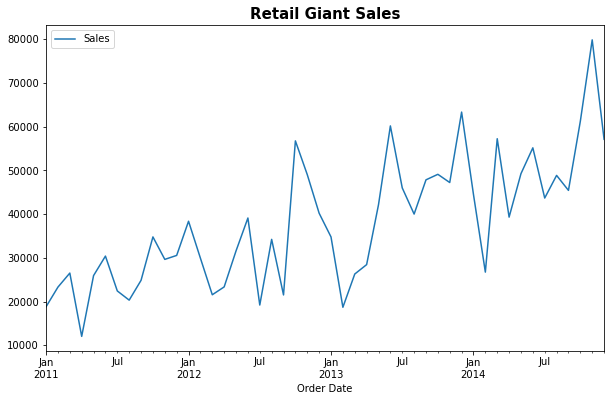

In [31]:
#Plot time series data
data_retail.plot(figsize=(10, 6))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=15)
plt.show()

## Step 4.2: Train - test split

In [32]:
#Take 42 months as train data and rest as test data
train_len = 42
train = data_retail[0:train_len] #First 42 months train data
test = data_retail[train_len:] #last 6 months test data

## Step 4.3: Time series decomposition

Time series data can be split into trend, seasonality and residuals


#### - Additive Seasonal decomposition
Individual components are added to get time series data

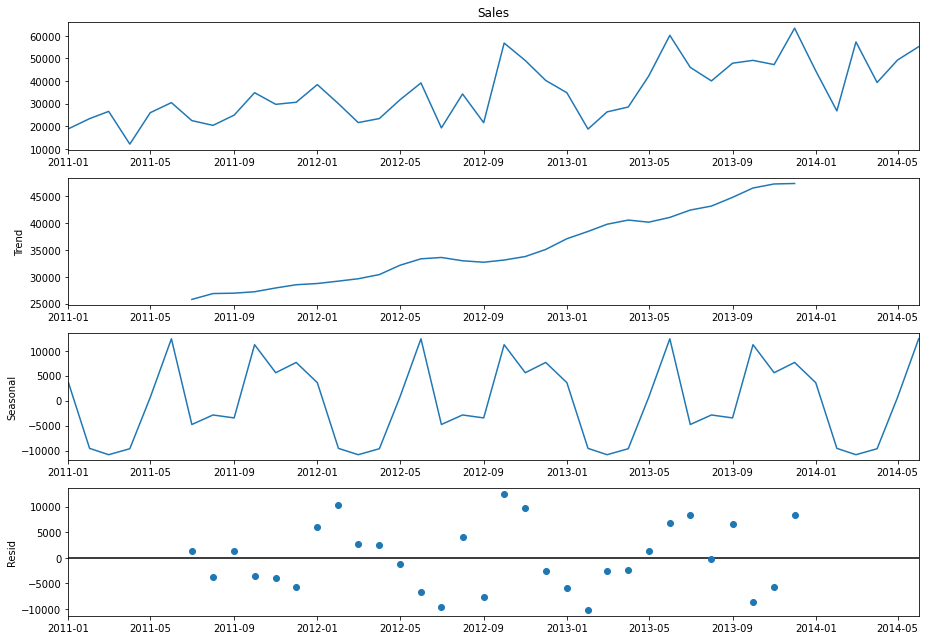

In [33]:
#Plot Additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 13, 9
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

#### - Multiplicative seasonal decomposition
Individual components are multiplied to get time series data

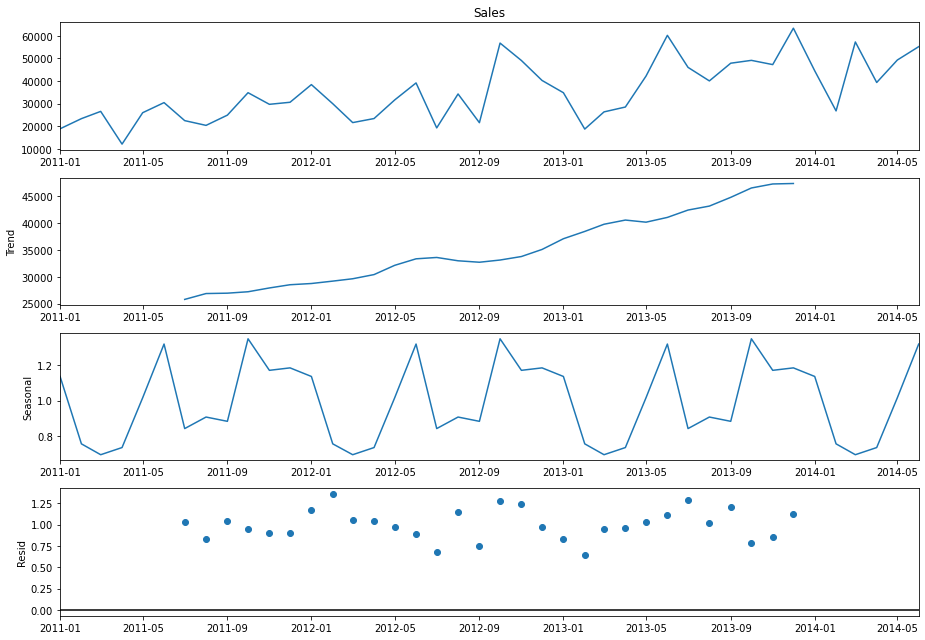

In [34]:
#Multiplocative decomposition
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

After lloking into it, lets build models with few of the relevent methods

# Step 5: Build and Evaluate Time Series Forecast

In [35]:
# Train-test split
train_len = 42
train = data_retail[0:train_len]
test = data_retail[train_len:]

## Step 5.1: Simple Time series methods

#### - Naive Method
Last month value to be predictor of all months

In [36]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1] #Last observation in the train data

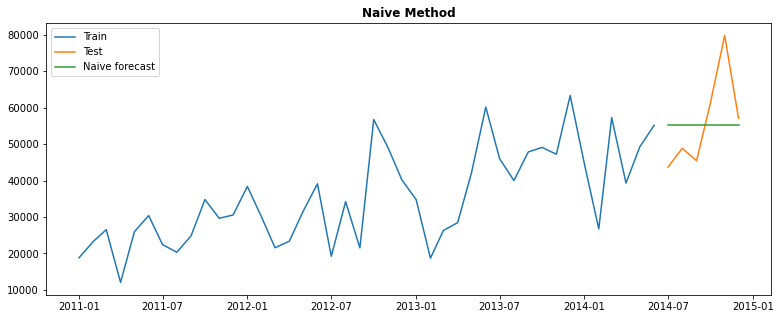

In [37]:
#Plot train, test, forecast
plt.figure(figsize=(13,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

In [38]:
#RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


Forecast for next 6 months is same as last value of train set

#### - Simple Average method
forecast is average of all past months sales

In [39]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()# Average of past months sales

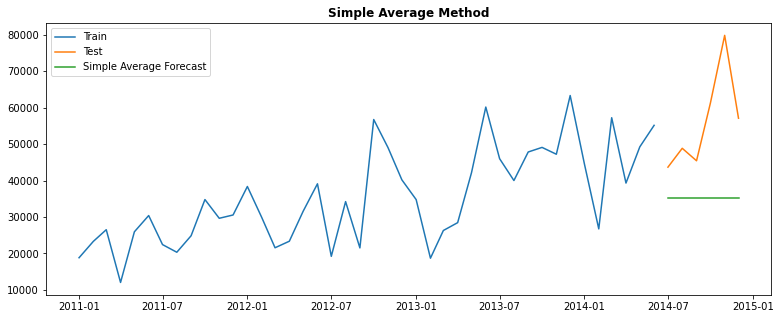

In [40]:
#Plot train, test and forecast
plt.figure(figsize=(13,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight='bold')
plt.show()

In [41]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


The forecast is not showing any seasonality and trend.

#### - Simple moving average method
Forecast is average of last few observation

In [42]:
y_hat_sma = data_retail.copy()
ma_window = 3  # Considering 3 month window
y_hat_sma['sma_forecast'] = data_retail['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

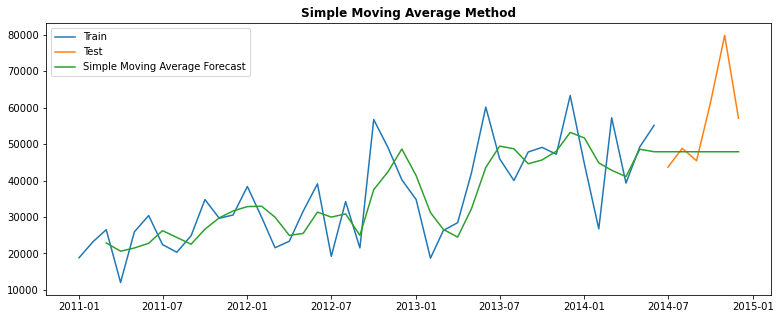

In [43]:
#Plot train,test and forecast
plt.figure(figsize=(13,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

In [44]:
#RMSE amd MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82



#### - Exponential Smoothing Technique
Captures level of a timeseries. Most recent period's demand is multiplied by smoothing factor

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


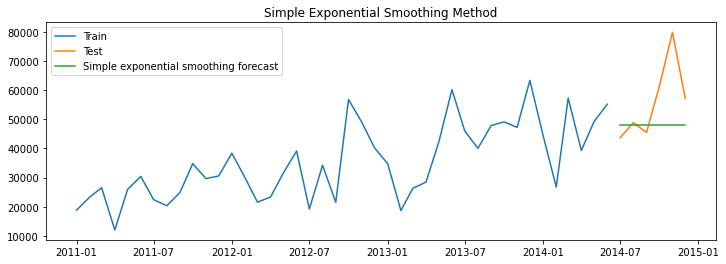

In [46]:
#Plot train, test, forecasting
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [47]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74


It is capturing level

#### - Holt's Exponential Smoothing
Captures level, trend of a time series in the forecast

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


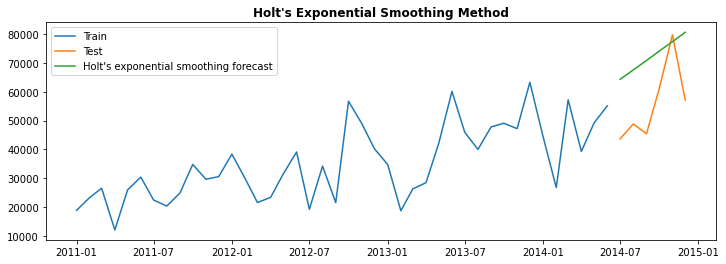

In [49]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

Both trend and levels captured

In [50]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57


#### - Holt Winters' additive method

Captures level, trend and seasonality

In [51]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


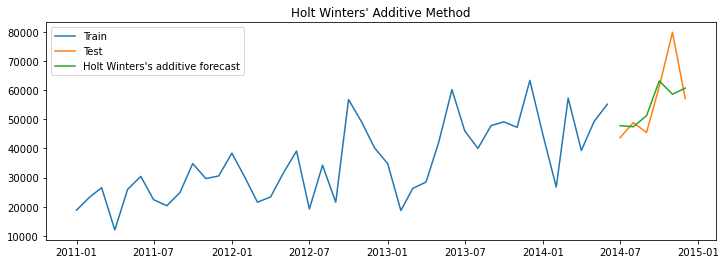

In [52]:
#Plot
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [53]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


#### - Holt Winter's multiplicative method 

In [54]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


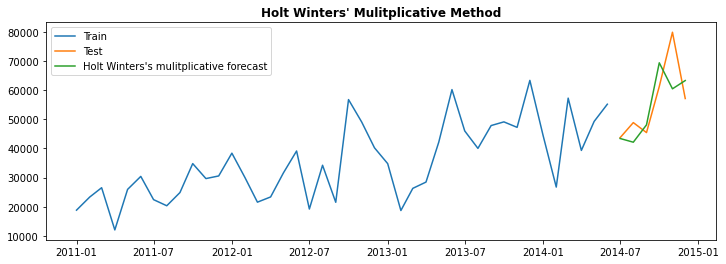

In [55]:
#Plot
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [56]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


In Smoothing techniques, Holt Winter's Additive method is giving better forecast after looking into RMSE and MAPE and also the graphs.

## Step 5.2: Auto Regressive Methods

#### Stationary v/s Non stationary


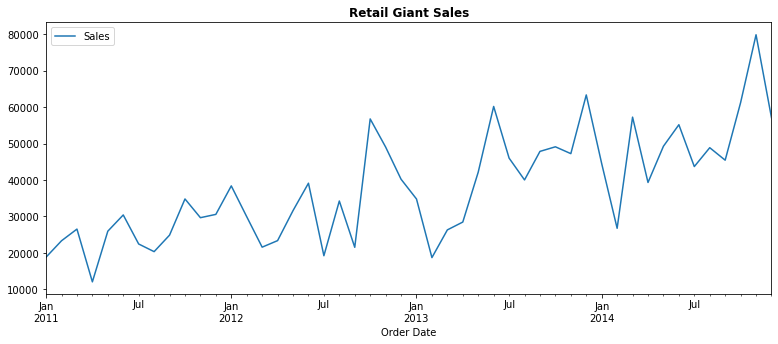

In [57]:
data_retail['Sales'].plot(figsize=(13, 5))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) test
H0(null hypothesis) - The series is not stationary, p-value is >0.05 <br>
H1(Alternate hypothesis) - The seies is stationary, p-value is <=0.05

In [58]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_retail['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


P-value is less than 0.05, reject null hypothesis. <br>
Series is Stationary

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
H0(null hypothesis) - The series is stationary, p-value is >0.05 <br>
H1(Alternate hypothesis) - The seies is not stationary, p-value is <=0.05

In [59]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_retail['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


p-value is less than 0.05, It is not stationary.
<br><br>
Methods to convert non-stationary to stationary
- Differencing
- Transforming

#### Box Cox transformation to make variance constant
It makes variance constant

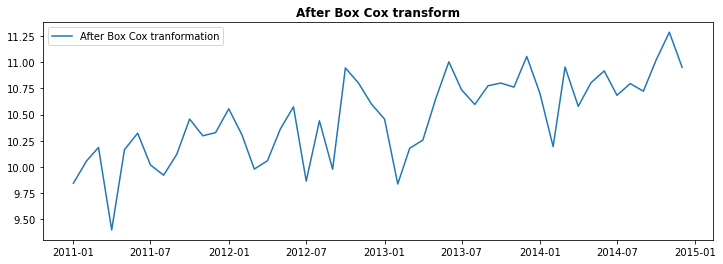

In [60]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data_retail['Sales'], lmbda=0), index = data_retail.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

#### Differencing to remove trend
It removes both trend and seasonality in Time series

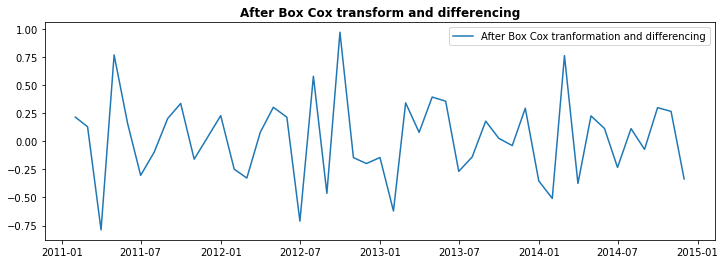

In [61]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_retail.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

Series seems to be stationary, mean is almost centered around zero

In [62]:
data_boxcox_diff.dropna(inplace=True)

In [63]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

#### Augmented Dickey-Fuller (ADF) test

In [64]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


P-value is less than 0.05, Reject null hypothesis and this is stationary

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [65]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


P-value greater than 0.05, failed to reject null hypothesis. Series is stationary

#### We have converted non stationary series to stationary series

#### Auto correlation Function (ACF)
ACF says the autocorrelation between observation and another observation at a prior time step that includes direct and indirect dependence information.

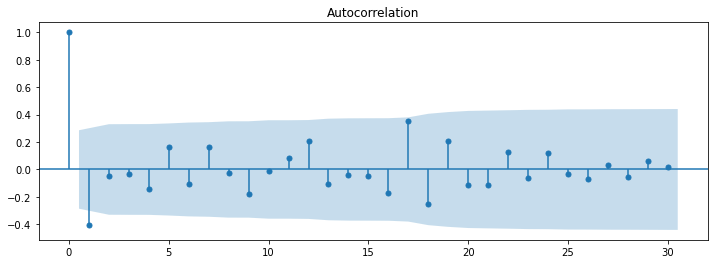

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

#### Partial autocorrelation function (PACF)
It describes the direct relationship between an observation and its lag

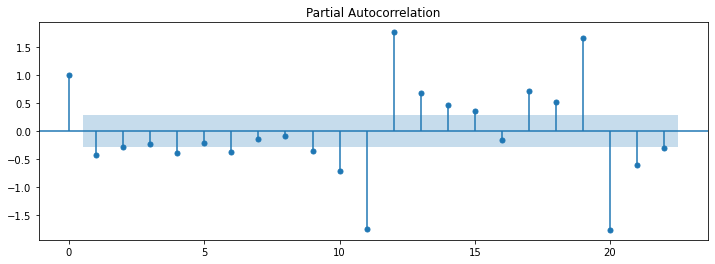

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()

In [68]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

#### We shall take p=1,q=1,d=1 

#### - Auto regression method (AR)

It models the future observation as a linear regression of one or more past observations.

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.024255
ar.L1.y   -0.406729
dtype: float64


In [70]:
#Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

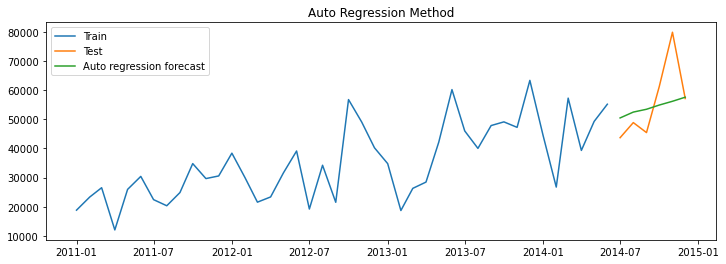

In [71]:
#Plot train test forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

It captures the trend but not seasonality

In [72]:
#MAPE and RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


#### Moving average method (MA)

Moving Average Model models the future forecasts using past forecast errors in a regression 
like model.

In [73]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.021415
ma.L1.y   -1.000000
dtype: float64


#### Recover original time series

In [74]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

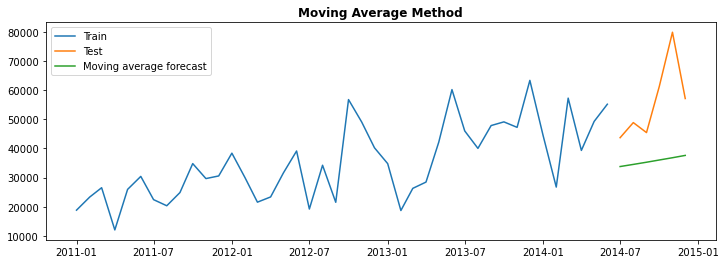

In [75]:
#Plot
plt.figure(figsize=(12,4))
plt.plot(data_retail['Sales'][:train_len], label='Train')
plt.plot(data_retail['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

Capturing only trend

In [76]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


Error is really high

#### - Auto regression moving average method (ARMA)

It models the future observation as linear regression of one or more past observations and past forecast errors.

In [77]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [78]:
#Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

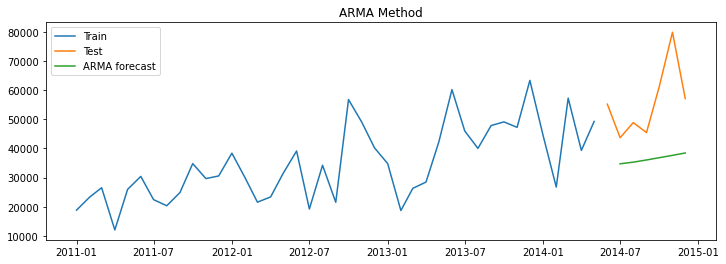

In [79]:
#Plot
plt.figure(figsize=(12,4))
plt.plot( data_retail['Sales'][:train_len-1], label='Train')
plt.plot(data_retail['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

Captures trend but not seasonality

In [80]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


Again it has got high error

#### - Auto regressive integrated moving average (ARIMA)

In [81]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p=1,d=1,q=1
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [82]:
#Recover original time series forecast
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

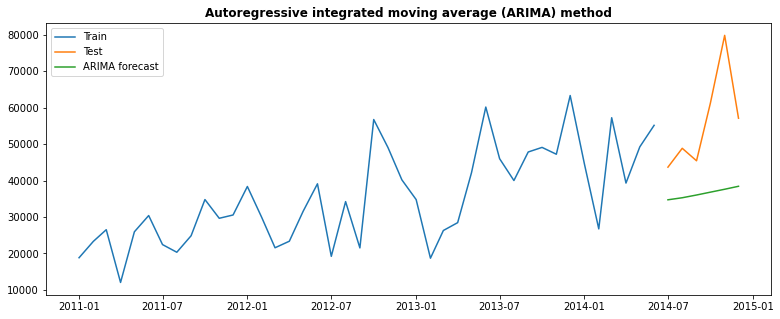

In [83]:
#Plot
plt.figure(figsize=(13,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

In [84]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


#### - Seasonal auto regressive integrated moving average (SARIMA)

SARIMA Model has both non seasonal elements and seasonal elements

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.041691
ma.L1      -0.998559
ar.S.L12    0.100641
ma.S.L12   -0.985413
sigma2      0.057392
dtype: float64


In [86]:
#Recover original time series forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

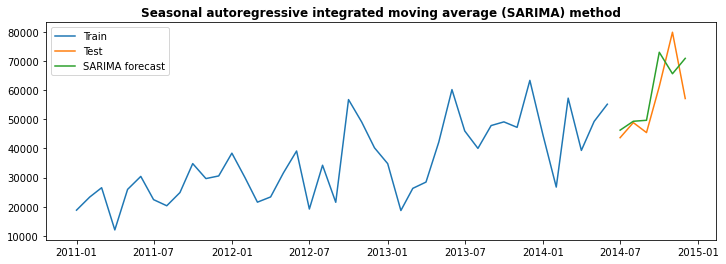

In [87]:
#Plot
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

Captures both trend and seasonality

In [88]:
#MAPE and RMSE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


SARIMA method is predicting the sales closer to real values, RMSE and MAPE are also least for this method

# Step 6 : Conclusion

### Holt's Winters Additive method is Best out of Smoothing techniques
### SARIMA method is best out of ARIMA set methods